In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#data on coronavirus from wikipedia (starting on the 10th of January)
cases_cumulative = [41, 41, 41, 41, 41, 45, 62, 121, 198, 291, 440, 571, 830, 1287, 1975, 2744, 4515, 5974, 7711, 9692, 11791, 14380, 17205, 20440, 24324, 28018, 31161, 34546, 37198, 40171, 42638, 44653, 46472, 48467, 49970, 51091]
deaths_cumulative = [1, 1, 1, 1, 2, 2, 2, 2, 3, 6, 9, 17, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 490, 563, 637, 722, 811, 908, 1016, 1113, 1325-108, 1380, 1523, 1665, 1770, 1868]
cases2_cumulative = [59804 , 63851, 66492, 68500, 70548, 72436]#new measure provided from 12 of february

So wikipedia, and many media outlets, have been providing cumulative values of incident cases and deaths relating to the recent outbreak of coronavirus. We can plot this...

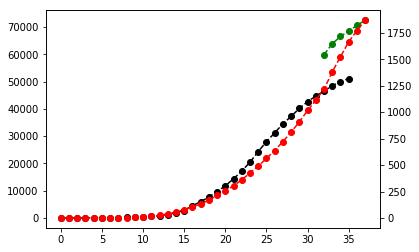

In [8]:
x_arr_co = np.arange(0, len(cases_cumulative), 1)
x_arr_d = np.arange(0, len(deaths_cumulative), 1)#generate an integer for each day
x_arr2 = np.arange(32, 32+len(cases2_cumulative), 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_arr_co, cases_cumulative, '--ko') #incidence in black (left axis)
ax1.plot(x_arr2, cases2_cumulative, '--go')#new incidence measure
ax2 = ax1.twinx()
ax2.plot(x_arr_d, deaths_cumulative, '--ro')#deaths in red (right axis)

plt.show()

Axis labels and a legend are required for us to interpret this, and indeed, any plot. 

Additionally, in this case, we are plotting the cumulative cases and cumulative deaths on different axis (left and right respectively), we need to indicate this. I have choosen to do this by changing the colour of the axis ticklables to match the two plotted lines. 

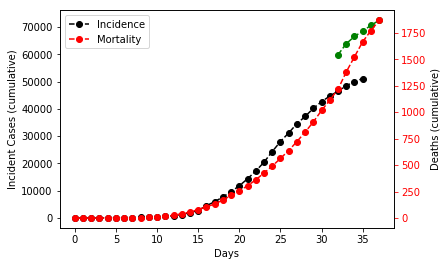

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
h1, = ax1.plot(x_arr_co, cases_cumulative, '--ko') #incidence in black (left axis)
ax1.plot(x_arr2, cases2_cumulative, '--go')#new incidence measure
ax2 = ax1.twinx()
h2, = ax2.plot(x_arr_d, deaths_cumulative, '--ro')#deaths in red (right axis)

#axis labels
ax1.set_ylabel("Incident Cases (cumulative)")
ax2.set_ylabel("Deaths (cumulative)")
ax2.tick_params(axis='y', colors='red')#change axis tick colour to match plotted line
ax1.set_xlabel("Days")

#legend
plt.legend((h1, h2), ("Incidence", "Mortality"))

plt.show()

Currently, the x-axis is given by days, where days are the number of days since I started recording the data from (the 10th of January). This is not particularly easy to interpret. We can use the inbuilt date modules in matplotlib to generate dates and format the ticklabels correctly. Note that we need to rotate the ticklabels to seee them clearly, and the use of the "DateFormatter()" function to set the date to the UK style.

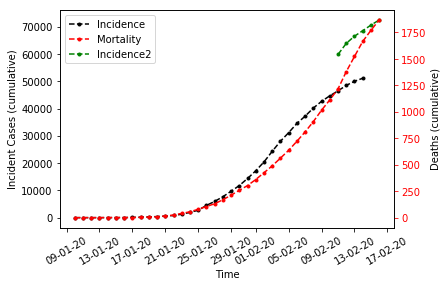

In [14]:

#set dates
date1 = mdates.datetime.date(2020, 1, 10)#date we started collecting data
date2 = mdates.datetime.date(2020, 2, 17)#yesterday's date
date3 = mdates.datetime.date(2020, 2, 11)#first day of new measure
date4 = mdates.datetime.date(2020, 2, 15)#last day of old measure
delta = mdates.datetime.timedelta(days=1)
dates_all = mdates.drange(date1, date2, delta)
dates_old = mdates.drange(date1, date4, delta)
dates_new = mdates.drange(date3, date2, delta)
formatter = mdates.DateFormatter('%d-%m-%y')#uk style date

fig = plt.figure()
ax1 = fig.add_subplot(111)
h1, = ax1.plot_date(dates_old, cases_cumulative, '--k.')
h3, = ax1.plot_date(dates_new, cases2_cumulative, '--g.')
ax2 = ax1.twinx()
h2, = ax2.plot_date(dates_all, deaths_cumulative, '--r.')

#y-axis labels
ax1.set_ylabel("Incident Cases (cumulative)")
ax2.set_ylabel("Deaths (cumulative)")
ax2.tick_params(axis='y', colors='red')#change axis tick colour to match plotted line

#x-axis labels
ax1.set_xlabel("Time")
ax1.xaxis.set_tick_params(rotation=30)
ax1.xaxis.set_major_formatter(formatter)#sets the format to the correct date type

#legend
plt.legend((h1, h2, h3), ("Incidence", "Mortality", "Incidence2"))

plt.show()


So far, so bad, the cumulative number of both cases and deaths is rsing over time. In order to understand how the epidemic is evolving, however, we need to know how the number of new cases is changing over time. To do this we convert the cumulative number of cases to the number of new cases per day.

In [15]:
def cumulative_to_new(cumulative_list):
    temp = cumulative_list.copy()
    temp.insert(0, 0) #zero in first day
    temp.pop() # remove last day
    new_list = np.subtract(cumulative_list,  temp)
    return np.delete(new_list, 0)    

cases_new = cumulative_to_new(cases_cumulative)
cases2_new = cumulative_to_new(cases2_cumulative)
deaths_new = cumulative_to_new(deaths_cumulative)

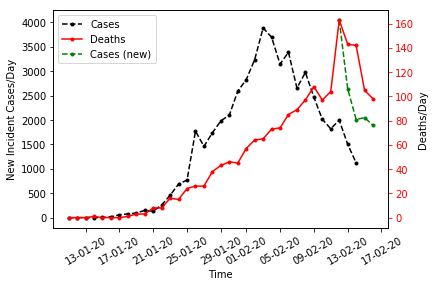

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
h1, = ax1.plot_date(dates_old[1:], cases_new, '--k.')
h3, = ax1.plot_date(dates_new[1:], cases2_new, '--g.')
ax2 = ax1.twinx()
h2, = ax2.plot_date(dates_all[1:], deaths_new, '-r.')

#y-axis labels
ax1.set_ylabel("New Incident Cases/Day")
ax2.set_ylabel("Deaths/Day")
ax2.tick_params(axis='y', colors='red')#change axis tick colour to match plotted line

#x-axis labels
ax1.set_xlabel("Time")
ax1.xaxis.set_tick_params(rotation=30)
ax1.xaxis.set_major_formatter(formatter)#sets the format to the correct date type

#legend
plt.legend((h1, h2, h3), ("Cases", "Deaths", "Cases (new)"))

plt.show()

Various things could be done to improve this graph.
1. Change to colour scheme tolerent of black and white printing
2. Change line style make lines easier to distinguish
3. plot points for each day (whihc are then joined by lines)
4. Try a histogram 
5. Add various "external events" (i.e lockdown of Hubei province)


In [17]:
date_quarantine_wuhan = mdates.datetime.date(2020, 1, 22)#quarantine imposed on wuhan by chinese governement
date_quarantine_hubei = mdates.datetime.date(2020, 1, 24)#quarantine imposed on hubei by chinese governement
date_nm = mdates.datetime.date(2020, 2, 11)#date measurements changed

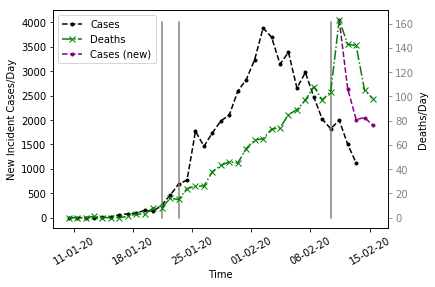

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

#plot incidence and mortality data
h1, = ax1.plot_date(dates_old[1:], cases_new, '--k.')
h3, = ax1.plot_date(dates_new[1:], cases2_new, '--g.', color = "purple")
h2, = ax2.plot_date(dates_all[1:], deaths_new, '-.rx', color="green")

#plot other events
h4, = ax1.plot_date([date_quarantine_wuhan, date_quarantine_wuhan], [0, 4000], '-r', color="grey")
h5, = ax1.plot_date([date_quarantine_hubei, date_quarantine_hubei], [0, 4000], '-r', color="grey")
h6, = ax1.plot_date([date_nm, date_nm], [0, 4000], '-r', color="grey")

#y-axis labels
ax1.set_ylabel("New Incident Cases/Day")
ax2.set_ylabel("Deaths/Day")
ax2.tick_params(axis='y', colors='grey')#change axis tick colour to match plotted line

#x-axis labels
ax1.set_xlabel("Time")
rule = mdates.rrulewrapper(mdates.WEEKLY)
loc = mdates.RRuleLocator(rule)
ax1.xaxis.set_major_locator(loc)
ax1.xaxis.set_tick_params(rotation=30)
ax1.xaxis.set_major_formatter(formatter)#sets the format to the correct date type

#legend
plt.legend((h1, h2, h3), ("Cases", "Deaths", "Cases (new)"))

plt.show()